## **CRM analysis**
Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.

Dataset: https://drive.google.com/drive/folders/1Iesv1Y7DVdv6Z4Oq8IwJ99_gMSEFecDk?usp=sharing


# **Steps Involved:**

1.	**Data Collection:** Gather transactional data containing information about customer purchases, including InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, and Country.
2.	**Data Preprocessing:** Clean and preprocess the data to handle missing values, remove duplicates, and format columns appropriately. Additionally, process the data to calculate RFM metrics (Recency, Frequency, Monetary) for each customer.
3.	**RFM Calculation:**
•	Recency (R): Calculate the number of days since the last purchase for each customer.
•	Frequency (F): Count the total number of purchases made by each customer.
•	Monetary (M): Calculate the total monetary value of purchases made by each customer.
4.	**RFM Segmentation:**
•	Assign RFM scores to each customer based on quantiles or predefined thresholds for Recency, Frequency, and Monetary metrics.
•	Segment customers into groups based on their RFM scores. Common segmentation approaches include quintiles (e.g., 1 to 5) or custom score ranges.
5.	**Exploratory Data Analysis (EDA):** Explore the RFM segments to gain insights into customer behavior and characteristics. Analyze central tendency and variability within each segment.
6.	**Visualization:**
•	Create visualizations such as histograms, box plots, and heatmaps to visualize the distribution of RFM scores across segments and identify patterns and trends.
•	Explore other visualization techniques like pie charts, bar plots, and scatter plots to further analyze customer segmentation and behavior.
7.	**Segment Profiling:**
•	Profile each segment based on demographic, geographic, and behavioral attributes to understand common characteristics and preferences within each group.
•	Identify high-value segments that contribute significantly to revenue and low-value segments that may require targeted marketing efforts.
8.	**Analysis and Insights:**
•	Conduct statistical analysis and hypothesis testing to compare different segments and assess the significance of differences in key metrics.
•	Gain insights into customer preferences, purchasing behavior, and lifecycle stages to inform marketing strategies and business decisions.
9.	**Actionable Recommendations:**
•	Translate insights from customer segmentation analysis into actionable recommendations for marketing campaigns, product development, and customer engagement initiatives.
•	Implement targeted marketing strategies and personalized experiences to optimize customer interactions and drive business growth.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Ecom_CRM_analysis.csv", encoding = "unicode_escape")

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#delete rows with NaN values
df = df.dropna()

In [ ]:
df = df.drop_duplicates()

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDayOfWeek'] = df['InvoiceDate'].dt.dayofweek

In [ ]:
#convert float to int
df['CustomerID']= df['CustomerID'].astype(int)

<Axes: xlabel='count', ylabel='Country'>

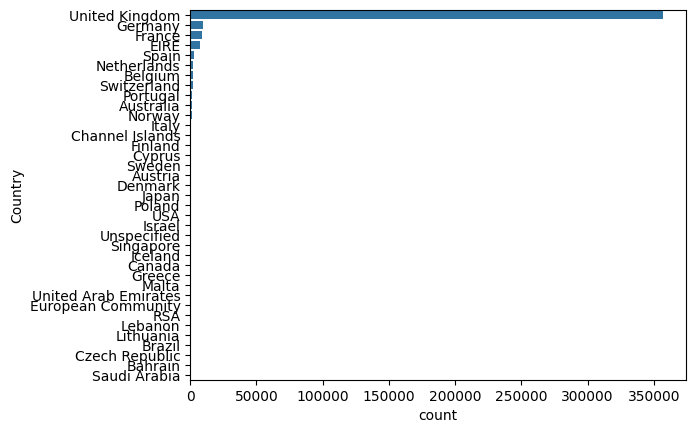

In [ ]:
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index)

Text(0.5, 1.0, 'Top 10 Most Frequent StockCodes')

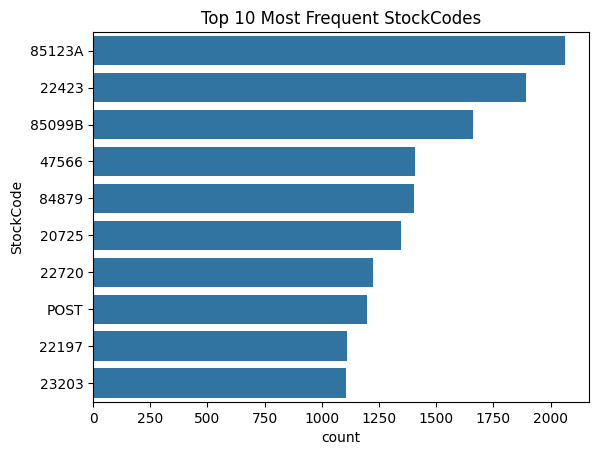

In [ ]:
sns.countplot(y='StockCode', data=df, order=df['StockCode'].value_counts().iloc[:10].index)
plt.title('Top 10 Most Frequent StockCodes')

Text(0.5, 1.0, 'Number of Transactions by Month')

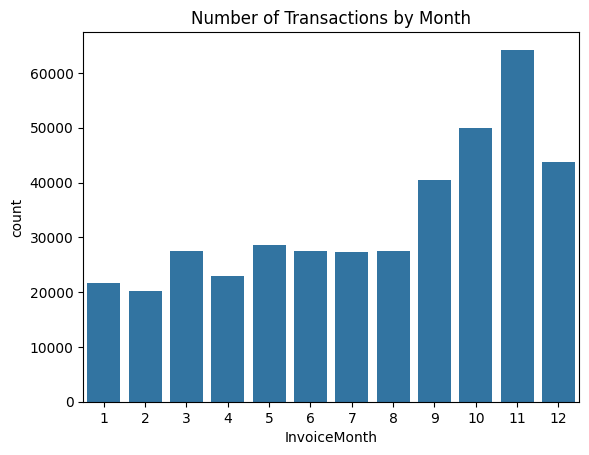

In [ ]:
sns.countplot(x='InvoiceMonth', data=df)
plt.title('Number of Transactions by Month')

Text(0.5, 1.0, 'Number of Transactions by Day of Week')

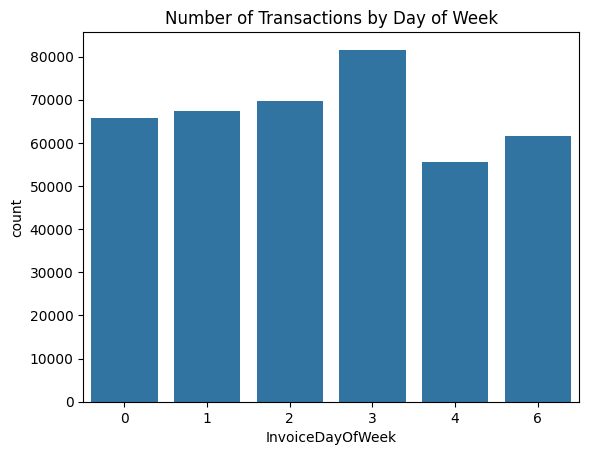

In [ ]:
sns.countplot(x='InvoiceDayOfWeek', data=df)
plt.title('Number of Transactions by Day of Week')

In [ ]:
df['Quantity'].describe()

count    401604.000000
mean         12.183273
std         250.283037
min      -80995.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
# Create a new column "Has Returns" indicating whether the transaction involves returns
# Assuming negative Quantity values indicate returns
df['Returns'] = (df['Quantity'] < 0).astype(int)

# Replace negative Quantity values with 0
df['Quantity'] = df['Quantity'].apply(lambda x: max(0, x))


Text(0.5, 1.0, 'Boxplot of Quantity')

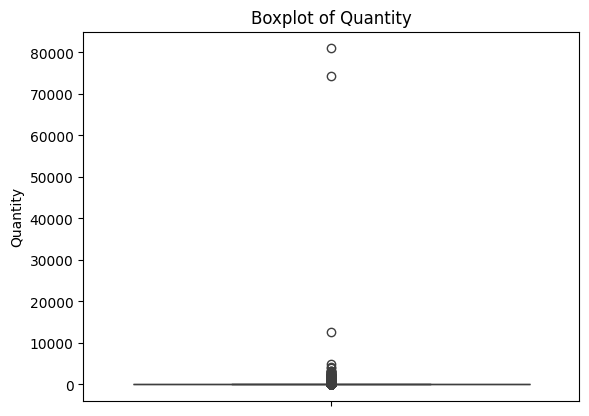

In [ ]:
sns.boxplot(df['Quantity'])
plt.title('Boxplot of Quantity')

In [ ]:
df["Quantity"].describe()

count    401604.000000
mean         12.863134
std         179.581848
min           0.000000
25%           2.000000
50%           5.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Quantity column
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]


Text(0.5, 1.0, 'Boxplot of Quantity')

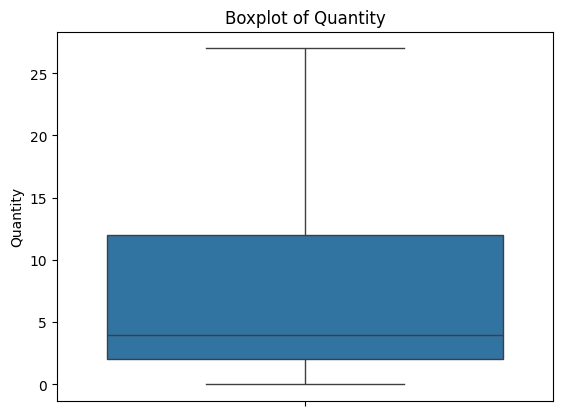

In [ ]:
sns.boxplot(df['Quantity'])
plt.title('Boxplot of Quantity')

Text(0.5, 1.0, 'Boxplot of UnitPrice')

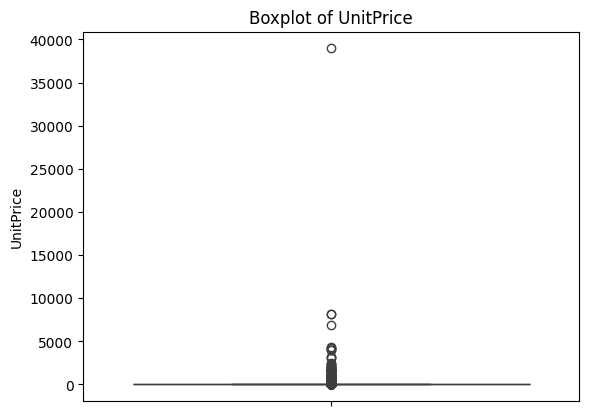

In [ ]:
sns.boxplot(df['UnitPrice'])
plt.title('Boxplot of UnitPrice')

In [ ]:
df["UnitPrice"].describe()

count    375979.000000
mean          3.609260
std          72.091503
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max       38970.000000
Name: UnitPrice, dtype: float64

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the Quantity column
df = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]


Text(0.5, 1.0, 'Boxplot of UnitPrice')

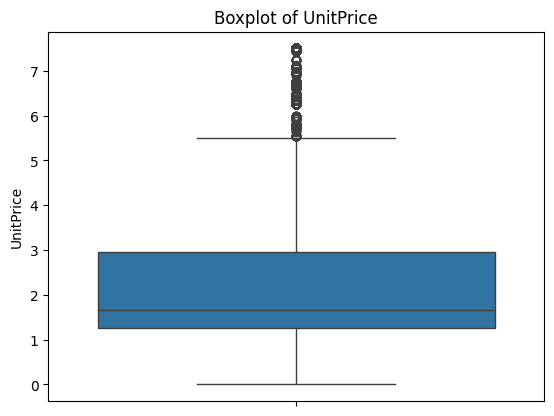

In [ ]:
sns.boxplot(df['UnitPrice'])
plt.title('Boxplot of UnitPrice')

In [ ]:
df.nunique()

InvoiceNo           19788
StockCode            3422
Description          3605
Quantity               28
InvoiceDate         18406
UnitPrice             239
CustomerID           4239
Country                37
InvoiceMonth           12
InvoiceDayOfWeek        6
Returns                 2
dtype: int64

In [ ]:
# Calculate total price for each transaction
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,InvoiceDayOfWeek,Returns,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,12,2,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,12,2,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,12,2,0,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,12,4,0,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12,4,0,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,12,4,0,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,12,4,0,16.60


In [ ]:
df_per_customer = df.groupby(['InvoiceNo', 'CustomerID']).agg(
    TotalPriceInvoice=('TotalPrice', 'sum'),
    InvoiceDate=('InvoiceDate', 'max')
).reset_index()
df_per_customer

,InvoiceNo,CustomerID,TotalPriceInvoice,InvoiceDate
0,536365,17850,123.82,2010-12-01 08:26:00
1,536366,17850,22.20,2010-12-01 08:28:00
2,536367,13047,141.15,2010-12-01 08:34:00
3,536368,13047,70.05,2010-12-01 08:34:00
4,536369,13047,17.85,2010-12-01 08:35:00
...,...,...,...,...
19783,C581468,13599,0.00,2011-12-08 19:26:00
19784,C581470,17924,0.00,2011-12-08 19:28:00
19785,C581484,16446,0.00,2011-12-09 09:27:00
19786,C581490,14397,0.00,2011-12-09 09:57:00


In [ ]:
customer_invoice_summary = df_per_customer.groupby('CustomerID').agg(
    LastPurchaseDate=('InvoiceDate', 'max'),
    FirstPurchaseDate=('InvoiceDate', 'min'),
    NumPurchases=('InvoiceNo', 'nunique'),
    Monetary=('TotalPriceInvoice', 'sum')
).reset_index()
customer_invoice_summary

,CustomerID,LastPurchaseDate,FirstPurchaseDate,NumPurchases,Monetary
0,12346,2011-01-18 10:17:00,2011-01-18 10:17:00,1,0.00
1,12347,2011-12-07 15:52:00,2010-12-07 14:57:00,7,3314.73
2,12348,2011-04-05 10:47:00,2010-12-16 19:09:00,3,90.20
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,1,999.15
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,1,294.40
...,...,...,...,...,...
4234,18280,2011-03-07 09:52:00,2011-03-07 09:52:00,1,137.00
4235,18281,2011-06-12 10:53:00,2011-06-12 10:53:00,1,46.92
4236,18282,2011-12-02 11:43:00,2011-08-05 13:35:00,3,113.13
4237,18283,2011-12-06 12:02:00,2011-01-06 14:14:00,16,2002.63


In [ ]:
# Calculate the reference date (latest date in the dataset)
reference_date = df['InvoiceDate'].max()

# Calculate recency as the difference between the reference date and the last purchase date
customer_invoice_summary['Recency'] = (reference_date - customer_invoice_summary['LastPurchaseDate']).dt.days


In [ ]:
customer_invoice_summary

,CustomerID,LastPurchaseDate,FirstPurchaseDate,NumPurchases,Monetary,Recency
0,12346,2011-01-18 10:17:00,2011-01-18 10:17:00,1,0.00,325
1,12347,2011-12-07 15:52:00,2010-12-07 14:57:00,7,3314.73,1
2,12348,2011-04-05 10:47:00,2010-12-16 19:09:00,3,90.20,248
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,1,999.15,18
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,1,294.40,309
...,...,...,...,...,...,...
4234,18280,2011-03-07 09:52:00,2011-03-07 09:52:00,1,137.00,277
4235,18281,2011-06-12 10:53:00,2011-06-12 10:53:00,1,46.92,180
4236,18282,2011-12-02 11:43:00,2011-08-05 13:35:00,3,113.13,7
4237,18283,2011-12-06 12:02:00,2011-01-06 14:14:00,16,2002.63,3


In [ ]:
customer_invoice_summary['Frequency'] = customer_invoice_summary['NumPurchases'] / ((customer_invoice_summary['LastPurchaseDate'] - customer_invoice_summary['FirstPurchaseDate']).dt.days + 1)


In [ ]:
customer_invoice_summary

,CustomerID,LastPurchaseDate,FirstPurchaseDate,NumPurchases,Monetary,Recency,Frequency
0,12346,2011-01-18 10:17:00,2011-01-18 10:17:00,1,0.00,325,1.000000
1,12347,2011-12-07 15:52:00,2010-12-07 14:57:00,7,3314.73,1,0.019126
2,12348,2011-04-05 10:47:00,2010-12-16 19:09:00,3,90.20,248,0.027273
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,1,999.15,18,1.000000
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,1,294.40,309,1.000000
...,...,...,...,...,...,...,...
4234,18280,2011-03-07 09:52:00,2011-03-07 09:52:00,1,137.00,277,1.000000
4235,18281,2011-06-12 10:53:00,2011-06-12 10:53:00,1,46.92,180,1.000000
4236,18282,2011-12-02 11:43:00,2011-08-05 13:35:00,3,113.13,7,0.025210
4237,18283,2011-12-06 12:02:00,2011-01-06 14:14:00,16,2002.63,3,0.047904


In [ ]:
# Calculate percentiles for each RFM metric
rfm_percentiles = customer_invoice_summary[['Recency', 'Frequency', 'Monetary']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

# Define function to map percentile values to RFM scores (1 to 5)
def map_to_rfm_score(x, metric):
    if x <= rfm_percentiles[metric][0.2]:
        return 1
    elif x <= rfm_percentiles[metric][0.4]:
        return 2
    elif x <= rfm_percentiles[metric][0.6]:
        return 3
    elif x <= rfm_percentiles[metric][0.8]:
        return 4
    else:
        return 5

# Map percentile values to RFM scores
customer_invoice_summary['R_score'] = customer_invoice_summary['Recency'].apply(map_to_rfm_score, args=('Recency',))
customer_invoice_summary['F_score'] = customer_invoice_summary['Frequency'].apply(map_to_rfm_score, args=('Frequency',))
customer_invoice_summary['M_score'] = customer_invoice_summary['Monetary'].apply(map_to_rfm_score, args=('Monetary',))

# Define function to label customers based on RFM scores
def label_customer(row):
    if row['R_score'] <= 2 and row['F_score'] >= 4 and row['M_score'] >= 4:
        return 'Champion'
    elif row['R_score'] <=3 and row['F_score'] <= 2 and row['M_score'] >= 4:
        return 'Potential Loyalist'
    elif row['R_score'] <= 3 and row['F_score'] >= 3 and row['M_score'] >= 3:
        return 'Loyal Customers'
    elif row['R_score'] <= 4 and row['F_score'] >= 2 and row['M_score'] >= 2:
        return 'Promising'
    else:
        return 'Needs Attention'

# Label customers based on RFM scores
customer_invoice_summary['Segment'] = customer_invoice_summary.apply(label_customer, axis=1)

customer_invoice_summary


,CustomerID,LastPurchaseDate,FirstPurchaseDate,NumPurchases,Monetary,Recency,Frequency,R_score,F_score,M_score,Segment
0,12346,2011-01-18 10:17:00,2011-01-18 10:17:00,1,0.00,325,1.000000,5,4,1,Needs Attention
1,12347,2011-12-07 15:52:00,2010-12-07 14:57:00,7,3314.73,1,0.019126,1,1,5,Potential Loyalist
2,12348,2011-04-05 10:47:00,2010-12-16 19:09:00,3,90.20,248,0.027273,5,2,1,Needs Attention
3,12349,2011-11-21 09:51:00,2011-11-21 09:51:00,1,999.15,18,1.000000,2,4,4,Champion
4,12350,2011-02-02 16:01:00,2011-02-02 16:01:00,1,294.40,309,1.000000,5,4,2,Needs Attention
...,...,...,...,...,...,...,...,...,...,...,...
4234,18280,2011-03-07 09:52:00,2011-03-07 09:52:00,1,137.00,277,1.000000,5,4,1,Needs Attention
4235,18281,2011-06-12 10:53:00,2011-06-12 10:53:00,1,46.92,180,1.000000,5,4,1,Needs Attention
4236,18282,2011-12-02 11:43:00,2011-08-05 13:35:00,3,113.13,7,0.025210,1,2,1,Needs Attention
4237,18283,2011-12-06 12:02:00,2011-01-06 14:14:00,16,2002.63,3,0.047904,1,3,5,Loyal Customers


In [ ]:
customer_invoice_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4239 entries, 0 to 4238
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         4239 non-null   int64         
 1   LastPurchaseDate   4239 non-null   datetime64[ns]
 2   FirstPurchaseDate  4239 non-null   datetime64[ns]
 3   NumPurchases       4239 non-null   int64         
 4   Monetary           4239 non-null   float64       
 5   Recency            4239 non-null   int64         
 6   Frequency          4239 non-null   float64       
 7   R_score            4239 non-null   int64         
 8   F_score            4239 non-null   int64         
 9   M_score            4239 non-null   int64         
 10  Segment            4239 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(6), object(1)
memory usage: 364.4+ KB


Text(0.5, 1.0, 'Proportion of Customers in Each Segment')

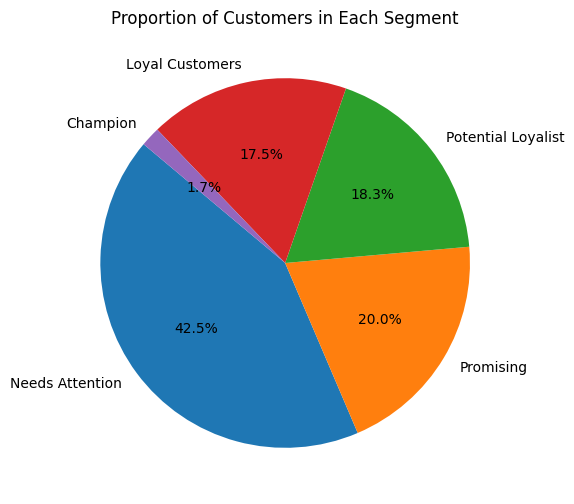

In [ ]:
# Pie Chart
plt.figure(figsize=(6,6))
customer_counts = customer_invoice_summary['Segment'].value_counts()
plt.pie(customer_counts, labels=customer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Customers in Each Segment')

In [ ]:
customer_invoice_summary['Segment'].value_counts()

Needs Attention       1803
Promising              847
Potential Loyalist     774
Loyal Customers        742
Champion                73
Name: Segment, dtype: int64

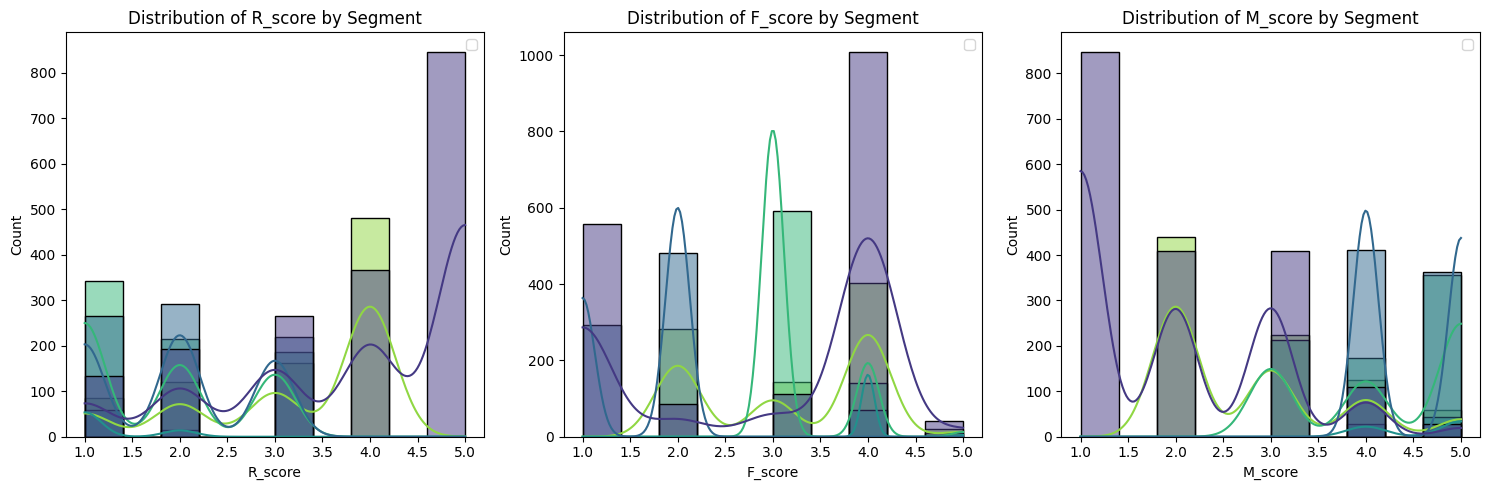

In [ ]:
# Set up the plotting environment
plt.figure(figsize=(15, 5))

# Create subplots for each RFM score
for i, score in enumerate(['R_score', 'F_score', 'M_score']):
    plt.subplot(1, 3, i + 1)
    sns.histplot(data= customer_invoice_summary, x=score, hue='Segment', bins=10, kde=True, palette='viridis')
    plt.title(f'Distribution of {score} by Segment')
    plt.xlabel(score)
    plt.ylabel('Count')
    plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Calculate mean, median, and mode of RFM scores within each segment
rfm_stats = customer_invoice_summary.groupby('Segment').agg({'R_score': ['mean', 'median', lambda x: x.mode()[0]],
                                       'F_score': ['mean', 'median', lambda x: x.mode()[0]],
                                       'M_score': ['mean', 'median', lambda x: x.mode()[0]]})

# Rename the lambda function columns to 'mode'
rfm_stats.columns = ['R_mean', 'R_median', 'R_mode',
                     'F_mean', 'F_median', 'F_mode',
                     'M_mean', 'M_median', 'M_mode']

# Display the statistics
print("RFM Statistics within each Segment:")
rfm_stats


RFM Statistics within each Segment:


,R_mean,R_median,R_mode,F_mean,F_median,F_mode,M_mean,M_median,M_mode
Segment,,,,,,,,,
Champion,1.205479,1.0,1,4.027397,4.0,4,4.602740,5.0,5
Loyal Customers,1.791105,2.0,1,3.215633,3.0,3,4.191375,4.0,5
Needs Attention,3.887410,4.0,5,2.938991,4.0,4,1.924570,2.0,1
Potential Loyalist,1.939276,2.0,2,1.622739,2.0,2,4.467700,4.0,4
Promising,3.221960,4.0,4,3.188902,3.0,4,2.766234,2.0,2


In [ ]:
customer_invoice_summary['Average_FM_score'] = (customer_invoice_summary['F_score']+customer_invoice_summary['M_score'])/2

Text(0.5, 1.0, 'Heatmap: Average_FM_score vs R_score')

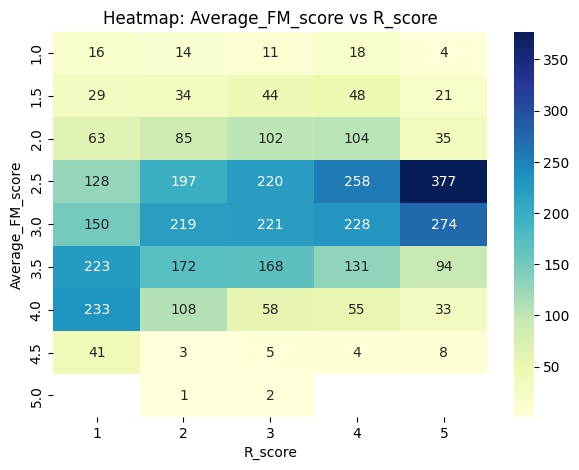

In [ ]:
plt.figure(figsize=(7,5))
heatmap_data = customer_invoice_summary.pivot_table(index='Average_FM_score', columns='R_score', values='CustomerID', aggfunc='count')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", cbar=True)
plt.title('Heatmap: Average_FM_score vs R_score')

Text(0, 0.5, 'Monetary')

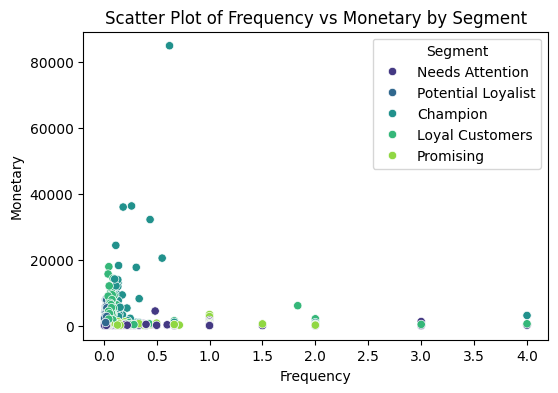

In [ ]:
# Scatter Plot
plt.figure(figsize=(6,4))
sns.scatterplot(data=customer_invoice_summary, x='Frequency', y='Monetary', hue='Segment', palette='viridis')
plt.title('Scatter Plot of Frequency vs Monetary by Segment')
plt.xlabel('Frequency')
plt.ylabel('Monetary')

In [ ]:
# lets count customers based on segments and country

# Define a list of all segments
segments = ['Champion', 'Loyal Customers', 'Needs Attention', 'Potential Loyalist', 'Promising']

# Create an empty dictionary to store pivot tables for each segment
segment_pivot_tables = {}

# Loop through each segment and create pivot table
for segment in segments:
    # Filter data for customers in the current segment
    segment_customers = customer_invoice_summary[customer_invoice_summary['Segment'] == segment]
    # Extract customer IDs of the current segment
    segment_customer_ids = segment_customers['CustomerID'].unique()
    # Filter original dataset for current segment customers
    segment_data = df[df['CustomerID'].isin(segment_customer_ids)]
    # Create a pivot table with country as rows, segment as columns, and count of unique customer IDs as values
    pivot_table = pd.pivot_table(segment_data, values='CustomerID', index='Country', aggfunc=pd.Series.nunique)
    # Store the pivot table in the dictionary with segment name as key
    segment_pivot_tables[segment] = pivot_table

# Access the pivot table for each segment from the dictionary
for segment, pivot_table in segment_pivot_tables.items():
    print(f"Segment: {segment}")
    print(pivot_table)


Segment: Champion
                CustomerID
Country                   
EIRE                     2
Germany                  3
Italy                    1
Netherlands              1
Portugal                 1
United Kingdom          65
Segment: Loyal Customers
                 CustomerID
Country                    
Australia                 2
Austria                   1
Belgium                   5
Channel Islands           1
Cyprus                    2
Denmark                   1
Finland                   5
France                   23
Germany                  26
Greece                    1
Italy                     3
Malta                     1
Norway                    1
Portugal                  5
RSA                       1
Spain                     2
Sweden                    1
Switzerland               4
USA                       2
United Kingdom          656
Segment: Needs Attention
                      CustomerID
Country                         
Australia                      4
A

# **Insights :**

**1.	Champion Segment (73 customers) :**

•	Recency (R): Champions have the lowest mean and median recency values, indicating that they are the most recent customers to make purchases. The mode recency value of 1 suggests that a significant portion of Champions made their last purchase very recently.

•	Frequency (F): Champions have the highest mean and median frequency values, indicating that they make purchases frequently. The mode frequency value of 4 suggests that many Champions make purchases around four times.

•	Monetary (M): Champions have the highest mean and median monetary values, indicating that they spend the most. The mode monetary value of 5 suggests that many Champions have a high monetary value for their purchases.

•	The Champion segment consists of a smaller group of highly engaged and high-spending customers.

•	While representing a smaller portion of the customer base, these customers contribute significantly to revenue and may act as brand advocates.

•	Personalized experiences, VIP treatment, and premium offerings can help maintain and further cultivate loyalty within this elite segment.

•	Majority of customers are from the United Kingdom, with only a few customers from other countries.

•	This segment likely represents the most valuable and loyal customers, as they contribute significantly to revenue.

**2.	Loyal Customers Segment (742 customers):**

•	Recency (R): Loyal Customers have moderate recency values, indicating that they are not as recent as Champions but still relatively recent in making purchases.

•	Frequency (F): Loyal Customers have a high mean and median frequency of purchases, suggesting that they make purchases frequently.

•	Monetary (M): Loyal Customers have a relatively high mean and median monetary value, indicating that they spend a considerable amount on their purchases.

•	The Loyal Customers segment comprises customers who have demonstrated consistent engagement and spending over time.

•	These customers represent a valuable segment for the business, as they are likely to make frequent purchases and contribute to revenue stability.

•	Retention-focused strategies, such as loyalty programs or exclusive offers, can help reinforce loyalty and maintain high levels of customer satisfaction within this segment.

•	Similar to the Champion segment, a large proportion of customers are from the United Kingdom.

•	There is also a noticeable presence of customers from other European countries such as France, Germany, and Belgium.

•	These customers are also likely to be valuable, with a relatively high frequency of purchases.

**3.	Needs Attention Segment (1803 customers) :**

•	Recency (R): Needs Attention customers have the highest mean and median recency values, indicating that they have not made purchases recently. The mode recency value of 5 suggests that many customers in this segment have not made purchases for a while.

•	Frequency (F): Needs Attention customers have a moderate frequency of purchases, with a mode frequency value of 4.

•	Monetary (M): Needs Attention customers have the lowest mean and median monetary values, indicating that they spend the least on their purchases.

•	This segment comprises the largest number of customers in the dataset, indicating that a significant portion of the customer base may require attention or intervention.

•	It may include customers who have not made recent purchases or have lower levels of engagement with the business.

•	Targeted retention strategies, such as personalized offers or re-engagement campaigns, could be implemented to improve customer satisfaction and loyalty within this segment.

•	While the majority of customers are still from the United Kingdom, there is a more diverse distribution across other countries compared to the Champion and Loyal Customers segments.

•	This segment contains customers who may require targeted marketing efforts to increase their engagement and loyalty.

**4.	Potential Loyalist Segment (774 customers):**

•	Recency (R): Potential Loyalists have relatively low recency values, indicating that they are recent customers.

•	Frequency (F): Potential Loyalists have a moderate frequency of purchases, with a mode frequency value of 2.

•	Monetary (M): Potential Loyalists have a relatively high mean and median monetary value, indicating that they spend a considerable amount on their purchases.

•	The Potential Loyalist segment represents customers who have shown promise in terms of both recency and monetary value.

•	These customers may have made recent purchases and have a relatively high monetary value, indicating potential for future loyalty and increased spending.

•	Strategies aimed at strengthening relationships and incentivizing repeat purchases could help solidify these customers as loyal advocates for the business.

•	Similar to the Loyal Customers segment, there is a significant presence of customers from the United Kingdom.

•	There are also promising signs from other European countries such as France, Germany, and Spain, indicating potential for growth and increased loyalty.

**5.	Promising Segment (847 customers) :**

•	Recency (R): Promising customers have moderate recency values, indicating that they are not as recent as Champions but still relatively recent in making purchases.

•	Frequency (F): Promising customers have a moderate frequency of purchases, with a mode frequency value of 4.

•	Monetary (M): Promising customers have a moderate monetary value for their purchases.

•	The Promising segment consists of a moderate number of customers who may have shown potential for future engagement and spending.

•	These customers may be newer or less frequent purchasers who have demonstrated some level of interest in the products or services.

•	Opportunities exist to nurture and convert these customers into more loyal and valuable segments through targeted marketing and engagement efforts.

•	The United Kingdom has the highest number of customers in this segment, indicating a strong potential for growth and loyalty.

•	There are also notable customers from other European countries such as France, Germany, and Spain, suggesting opportunities for expansion in these regions.



# **10 recommendations based on the analysis of the customer segmentation data:**
1.	Implement personalized marketing strategies tailored to each customer segment's preferences and behavior to maximize engagement and conversion rates.
2.	Develop loyalty programs and incentives targeting high-value segments such as Champions and Loyal Customers to foster long-term customer relationships and increase customer lifetime value.
3.	Focus on re-engaging customers in the "Needs Attention" segment through targeted promotions, product recommendations, and proactive customer support to reduce churn and improve retention rates.
4.	Leverage insights from the analysis to optimize inventory management and product offerings based on the demand patterns and preferences of different customer segments.
5.	Enhance the online shopping experience by customizing website features, product recommendations, and promotional offers based on individual customer segments' browsing and purchase history.
6.	Explore partnerships and collaborations with complementary businesses or brands to expand the customer base and reach new segments, particularly in untapped markets or regions.
7.	Invest in data-driven customer analytics and predictive modeling techniques to forecast future trends, anticipate customer needs, and proactively address emerging challenges or opportunities.
8.	Continuously monitor and evaluate the effectiveness of marketing campaigns, promotions, and customer engagement initiatives across different segments to refine strategies and optimize resource allocation.
9.	Foster a customer-centric culture within the organization by prioritizing customer feedback, satisfaction, and loyalty as key performance indicators across all departments and functions.
10.	Stay agile and adaptive in response to changing market dynamics, consumer preferences, and competitive landscape by regularly revisiting and refining customer segmentation strategies to maintain relevance and competitiveness in the market.
